# Classification: Genre predicting using baseline models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

## Data cleaning

In [2]:
# import data
df = pd.read_csv('/Users/joycetagal/Github/metis/reg/SpotifyFeatures.csv')

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [4]:
df['genre'].unique()

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [5]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Alternative         9353
Blues               9353
Children’s Music    9353
Anime               9353
Folk                9299
Hip-Hop             9295
Rock                9272
Classical           9256
Rap                 9232
World               9096
Soul                9089
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
A Capella            119
Name: genre, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  object 
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  object 
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [7]:
# replace mode with binary (as per Spotify Web API)
# https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features
df = df.replace({'mode': {'Major':1, 'Minor':0}})
df = df.replace({'key': {'C#':1, 'D#':3, 'C':0, 'D':2, 'G#':8, 'F#':6, 'B':11, 'A':9, 'G':7, 'E':4, 'A#':10, 'F':5}})

In [10]:
# Remove podcasts and other non-music genres
mask = ~df['genre'].isin(['Comedy', 'Movie', 'Soundtrack', 'A Capella'])

In [11]:
df = df[mask]
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


[Text(0, 0, 'Indie'),
 Text(1, 0, 'Jazz'),
 Text(2, 0, 'Pop'),
 Text(3, 0, 'Electronic'),
 Text(4, 0, 'Blues'),
 Text(5, 0, 'Children’s Music'),
 Text(6, 0, 'Anime'),
 Text(7, 0, 'Alternative'),
 Text(8, 0, 'Folk'),
 Text(9, 0, 'Hip-Hop'),
 Text(10, 0, 'Rock'),
 Text(11, 0, 'Classical'),
 Text(12, 0, 'Rap'),
 Text(13, 0, 'World'),
 Text(14, 0, 'Soul'),
 Text(15, 0, 'R&B'),
 Text(16, 0, 'Reggaeton'),
 Text(17, 0, 'Ska'),
 Text(18, 0, 'Reggae'),
 Text(19, 0, 'Dance'),
 Text(20, 0, 'Country'),
 Text(21, 0, 'Opera')]

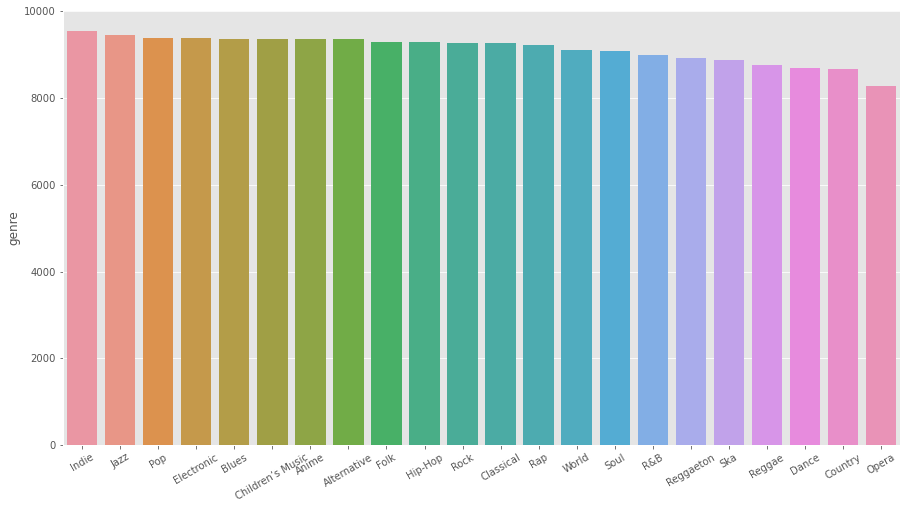

In [12]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x=df['genre'].value_counts().index, y=df['genre'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [14]:
X = df.select_dtypes(exclude=['object']).copy().reset_index(drop=True)

In [15]:
y = df['genre'].reset_index(drop=True)

In [16]:
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,21,0.986,0.313,490867,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,0.0886
1,18,0.972,0.360,176797,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,0.3690
2,10,0.935,0.168,266184,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,0.0696
3,17,0.961,0.250,288573,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,0.0380
4,19,0.985,0.142,629760,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,0.0382


In [17]:
X.shape

(200907, 11)

In [18]:
y.shape

(200907,)

In [19]:
y.tail()

200902    Opera
200903    Opera
200904    Opera
200905    Opera
200906    Opera
Name: genre, dtype: object

## KNN

In [28]:
# Naive KNN with scaled values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

knn_naive = KNeighborsClassifier()

# Split training and testing data
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11)
# Split data one more time into train and eval
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [36]:
knn_naive = KNeighborsClassifier(n_neighbors=5)
knn_naive.fit(X_tr, y_train)
y_pred = knn_naive.predict(X_te)
print('Accuracy score: {:6.2f}%'.format(100*metrics.accuracy_score(y_test, y_pred)))
print('Weighted precision score: {:6.2f}%'.format(100*metrics.precision_score(y_test, y_pred, average='weighted')))
print('Weighted recall score: {:6.2f}%'.format(100*metrics.recall_score(y_test, y_pred, average='weighted')))

Accuracy score:  27.11%
Weighted score:  29.18%


Since this is a multiclass classification, the mean accuracy score can be compared to the naive baseline accuracy which would be 100% divided by the number of unique targets, namely the accuracy if our model naively predicted just one target across all predictions. This is assuming that our targets are equally distributed across the data, which is roughly the case. 

Recall that in the MVP with only 6 selected genres, we had a mean accuracy score of 44%, which is significantly better than a naive accuracy of 100%/6 = 16.67%. 

In this case, we now have 22 unique target genres, which means that in a naive model which guessed only "Opera" for all the predictions would have a mean accuracy of 100%/22 = 4.54%. Thus, the KNN model performs better than the naive model at 27.11% mean accuracy across all targets.

In [47]:
# Let's do a pipeline that involves the following steps
# Scale the training data
# Use Kfold cross-validator to split data
# Use GridSearchCV to test parameters 

from sklearn.model_selection import (cross_val_score, KFold, GridSearchCV)
from sklearn.metrics import make_scorer, precision_score, accuracy_score, precision_recall_fscore_support, recall_score, f1_score
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scale", StandardScaler()),
                 ("knn", KNeighborsClassifier())
                ])

params = [{'knn__leaf_size': [15, 20], 'knn__n_neighbors': [31, 33, 35, 37, 39]}]

In [90]:
# GridSearch for KNN best model

# random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create weighted scorer
scoring_functions = {'precision': make_scorer(precision_score, average = 'weighted'),
                     'recall': make_scorer(recall_score, average = 'weighted'),
                     'f1': make_scorer(f1_score, average = 'weighted')
                    }

#Use GridSearch
grid_knn = GridSearchCV(pipe, params, scoring=scoring_functions, cv=kfold, refit='f1')

#Fit the model
best_model_knn = grid_knn.fit(X_train, y_train)

In [91]:
#Print The value of best Hyperparameters
print('Best estimator:', best_model.best_estimator_)
print('Best leaf_size:', best_model.best_estimator_.get_params()['knn__leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['knn__n_neighbors'])
print('Best mean accuracy score: {:6.2f}%'.format(100*best_model.best_score_))

Best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=39))])
Best leaf_size: 15
Best n_neighbors: 39
Best mean accuracy score:  32.14%


In [92]:
y_predict_knn = best_model.predict(X_train)
y_predict_knn_test = best_model.predict(X_test)

In [120]:
print('Train F1 score is: {:6.2f}%'.format(100*f1_score(y_train, y_predict_knn, average='weighted')))
print('Test F1 score is: {:6.2f}%'.format(100*f1_score(y_test, y_predict_knn_test, average='weighted')))

Train F1 score is:  36.28%
Test F1 score is:  31.44%


It looks like there's still some amount of overfitting in our model. Since this is a multiclass model, our accuracy score is an average across the model and even our F1 score is an average albeit a weighted average. To fully understand what's going on, let's examine each target in greater detail without averaging.

In [100]:
prfs = precision_recall_fscore_support(y_test, y_predict_knn_test, average=None)
prfs = pd.DataFrame(prfs).T
prfs['genre'] = ['Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop',
       'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World']
prfs.columns = ["precision", "recall",  "fscore",  "support", "genre"]
prfs.sort_values('precision', ascending=False)

,precision,recall,fscore,support,genre
19,0.756098,0.601942,0.670270,927.0,Ska
12,0.751864,0.845509,0.795941,835.0,Opera
4,0.652396,0.680128,0.665973,941.0,Classical
7,0.547844,0.518408,0.532720,1005.0,Electronic
17,0.512059,0.567901,0.538537,972.0,Reggaeton
16,0.441781,0.441781,0.441781,876.0,Reggae
21,0.431793,0.436716,0.434240,877.0,World
11,0.405263,0.377451,0.390863,1020.0,Jazz
13,0.268326,0.404167,0.322527,960.0,Pop
9,0.261508,0.406639,0.318311,964.0,Hip-Hop


As we can see here, once we break down the genres, we see a wide range of scores from an F-score of 67% (Ska) to 9.4% (Anime). Unsurprisingly, the more specific genres (e.g. Ska, Opera, Classical, Electronic) have higher scores in general.

## Decision Tree

Let's see if a decision tree model will do better.

In [122]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()

params = [{'max_depth': [10, 15, 20, 25, 30], 
           'max_leaf_nodes': [200, 250, 300, 350, 400, 450, 500],
           'class_weight': ['balanced']}]

In [123]:
# GridSearch for decision tree best model

# random shuffle
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create weighted scorer
scoring_functions = {'precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                     'recall': make_scorer(recall_score, average = 'weighted', zero_division=0),
                     'f1': make_scorer(f1_score, average = 'weighted', zero_division=0)
                    }

#Use GridSearch
grid_dt = GridSearchCV(decisiontree, params, scoring=scoring_functions, cv=kfold, refit='f1')

#Fit the model
best_model_dt = grid_dt.fit(X_train, y_train)

In [124]:
#Print The value of best Hyperparameters
print('Best estimator:', best_model_dt.best_estimator_)
print('Best max_depth:', best_model_dt.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:', best_model_dt.best_estimator_.get_params()['max_leaf_nodes'])
print('Best mean accuracy score: {:6.2f}%'.format(100*best_model_dt.best_score_))

Best estimator: DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=500)
Best max_depth: 20
Best max_leaf_nodes: 500
Best mean accuracy score:  30.33%


In [125]:
y_predict_dt = best_model_dt.predict(X_train)
y_predict_dt_test = best_model_dt.predict(X_test)

In [126]:
print('Train F1 score is: {:6.2f}%'.format(100*f1_score(y_train, y_predict_knn, average='weighted')))
print('Test F1 score is: {:6.2f}%'.format(100*f1_score(y_test, y_predict_dt_test, average='weighted')))

Train F1 score is:  36.28%
Test F1 score is:  30.76%


There's still an amount of overfitting, so if we choose this model we can go back and try and fix the overfitting. First, let's see if the range for the targets improve.

In [134]:
prfs_dt = precision_recall_fscore_support(y_test, y_predict_dt_test, average=None)
prfs_dt = pd.DataFrame(prfs_dt).T
prfs_dt['genre'] = ['Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop',
       'Indie', 'Jazz', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae',
       'Reggaeton', 'Rock', 'Ska', 'Soul', 'World']
prfs_dt.columns = ["precision", "recall",  "fscore",  "support", "genre"]
prfs_dt.sort_values('precision', ascending=False)

,precision,recall,fscore,support,genre
12,0.847141,0.869461,0.858156,835.0,Opera
4,0.689690,0.732200,0.710309,941.0,Classical
19,0.638246,0.565264,0.599542,927.0,Ska
7,0.525832,0.455721,0.488273,1005.0,Electronic
21,0.498433,0.362600,0.419802,877.0,World
17,0.473176,0.453704,0.463235,972.0,Reggaeton
11,0.374172,0.332353,0.352025,1020.0,Jazz
16,0.364802,0.357306,0.361015,876.0,Reggae
5,0.289588,0.312646,0.300676,854.0,Country
9,0.250341,0.380705,0.302058,964.0,Hip-Hop


Looking at the genres, we can see that the model performs really well on certain genres and poorly on others, with F1 scores ranging from 85.8% (Opera) to 6% (Anime). The range is larger overall compared to our KNN model.

## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
randomforest = RandomForestClassifier(n_estimators=75)
randomforest.fit(X_train, y_train)
randomforest.score(X_test, y_test)

0.29550315873252747

In [107]:
y_pred = randomforest.predict(X_test)
print("Default threshold:")
print("Precision: {:6.2f}%,   Recall: {:6.2f}%".format(100*precision_score(y_test, y_pred, average='macro'), 
                                                     100*recall_score(y_test, y_pred, average='macro')))

Default threshold:
Precision:  33.01%,   Recall:  28.87%
